In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
import cv2
from skimage.feature import hog


In [2]:
car_images = glob.glob("vehicles/KITTI_extracted/*.png")
non_car_images = glob.glob("non-vehicles/Extras/*.png")

In [3]:
cars = []
notcars = []
for image in car_images:
    image = mpimg.imread(image)
    cars.append(image)
for image in non_car_images:
    image = mpimg.imread(image)
    notcars.append(image)

In [4]:
print("length of cars dataset: ",len(cars))
print("length of non-cars dataset: ", len(notcars))


length of cars dataset:  5966
length of non-cars dataset:  5068


In [5]:
#Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    """
    This function returns HOG-Featurs and a HOG-Img-Visualization. Input image needs to bee in grayscale.
    - < from skimage.feature import hog > needs to be imported!
    
    Input: gray_img, orien, pix_per_cell, cell_per_block, vis (default = False)
    
    Output: (if vis = True)-> features, hof_image | if vis = False -> features
    """
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features


In [28]:
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# convert to grayscale
gray = cv2.cvtColor(cars[1], cv2.COLOR_RGB2GRAY)

features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

/home/sebastian/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [10]:
help(get_hog_features)

Help on function get_hog_features in module __main__:

get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True)
    This function returns HOG-Featurs and a HOG-Img-Visualization. Input image needs to bee in grayscale.
    Input: gray_img, orien, pix_per_cell, cell_per_block, vis (default = False)
    
    Output: (if vis = True)-> features, hof_image | if vis = False -> features



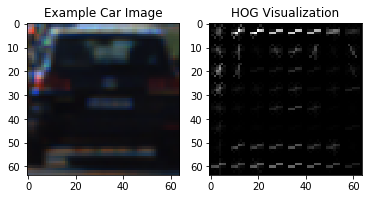

In [30]:
# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(cars[1], cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

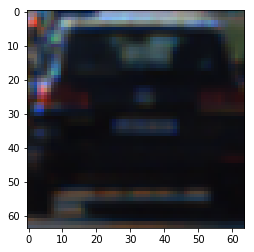

In [4]:
plt.imshow(cars[1])
plt.show()

In [8]:
hsv = cv2.cvtColor(cars[1], cv2.COLOR_RGB2HSV)

luv = cv2.cvtColor(cars[1], cv2.COLOR_RGB2LUV)

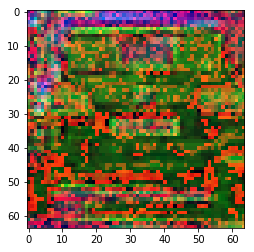

In [7]:
plt.imshow(hsv)
plt.show()

ValueError: Floating point image RGB values must be in the 0..1 range.